# Source Detector Separation
To calculate and graph the relationship between the slot number and the ratio of counts at each slot over the number of counts at slot 6.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [28]:
slot = np.linspace(6, 1, num = 6)

# Am-241
Am_data = np.genfromtxt('exp4a_Am241.tsv', skip_header = 11)
Am_counts = Am_data[:,2] # counts at different slots (indescending order from 6 to 1)

#arrays of zero
Am_mean = np.zeros(6)
Am_delta = np.zeros(6)

#for loop to calculate the mean and uncertainty of the counts at each slot
for n in [0,2,4,6,8,10]: 
    Am_mean[int(n/2)] = (Am_counts[n]+Am_counts[n+1])/2 # mean
    Am_delta[int(n/2)] = np.abs(Am_counts[n]-Am_counts[n+1])/2 # uncertainty

print(Am_mean, Am_delta)

# find ratios and uncertainty of the ratios
Am_ratio = Am_mean/Am_mean[0] # ratios with respect to slot 6 counts
Am_ratio_delta = (Am_delta/Am_mean)+(Am_delta[0]/Am_mean[0]) 
# uncertainty of the ratio. Addition since the variables are dependent

# Sr-90
Sr_data = np.genfromtxt('exp4a_Sr90.tsv', skip_header = 11)
Sr_counts = Sr_data[:,2] # counts at different slots (indescending order from 6 to 1)

#array of zeros
Sr_mean = np.zeros(6)
Sr_delta = np.zeros(6)

#for loop to calculate the mean and uncertainty of the counts at each slot
for n in [0,2,4,6,8,10]:
    Sr_mean[int(n/2)] = (Sr_counts[n]+Sr_counts[n+1])/2 # mean
    Sr_delta[int(n/2)] = np.abs(Sr_counts[n]-Sr_counts[n+1])/2 # uncertainty

print(Sr_mean, Sr_delta)

# find ratios and uncertainty of the ratios
Sr_ratio = Sr_mean/Sr_mean[0] # ratios with respect to slot 6 counts
Sr_ratio_delta = (Sr_delta/Am_mean)+(Sr_delta[0]/Sr_mean[0]) 
# uncertainty of the ratio. Addition since the variables are dependent

[7091.  2128.    97.5   45.    32.5   25. ] [75.  24.   9.5  1.   5.5  7. ]
[3955.  2720.5 1922.5 1096.   662.   504. ] [25.  32.5 12.5  8.   5.   8. ]


In [29]:
Am_fit = np.polyfit(slot, np.log(Am_ratio), 1)
print(Am_fit)

Sr_fit = np.polyfit(slot, np.log(Sr_ratio), 1)
print(Sr_fit)

[ 1.18733749 -7.7529045 ]
[ 0.43150496 -2.54801109]


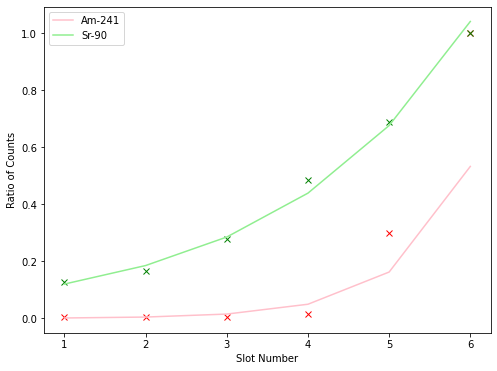

In [30]:
# plot the curves

plt.figure(figsize=(8, 6))
plt.plot(slot, Am_ratio, 'x', color = 'r')
plt.plot(slot, np.exp(Am_fit[1])*np.exp(Am_fit[0])**slot, color='pink', label = 'Am-241')
plt.plot(slot, Sr_ratio, 'x', color = 'g')
plt.plot(slot, np.exp(Sr_fit[1])*np.exp(Sr_fit[0])**slot, color='lightgreen', label = 'Sr-90')
plt.xlabel("Slot Number")
plt.ylabel("Ratio of Counts")
plt.legend(loc='best')
plt.show()